> # **Customer Churn Analysis**

> # **Data Wrangling**









**Responsibilities**


* Select and download the real-world dataset.
* Load data using Pandas.
* Inspect structure, datatypes, and metadata.
* Handle missing values (imputation, removal, domain reasoning).
* Treat duplicates and inconsistent formats.
* Detect and fix outliers using statistical rules.
* Save and document the cleaned dataset.

**Deliverables**

* Cleaned CSV.
* Cleaning notebook section with explanations.
* Summary of transformations.


### Imports libirary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import norm, ttest_ind, chi2_contingency, f_oneway, pearsonr
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')





# **load data**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **INITIAL INSPECTION**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape


(7043, 21)

# **FIX DATA TYPES**

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# **MISSING VALUES ANALYSIS**

In [8]:
df.isnull().sum().to_frame('Missing Values')

,Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#### Business logic: TotalCharges = tenure × MonthlyCharges

In [9]:
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

In [10]:
df.isnull().sum().to_frame('Missing Values')

,Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **DUPLICATES**

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

# **INCONSISTENT FORMATS FIX**

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


# **FEATURE TYPES SEPARATION**

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
categorial_cols = df.select_dtypes(include=['object']).columns.to_list()
categorial_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# **OUTLIERS DETECTION (IQR)**

> **numeric columns**

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\nOutliers in column: {col}")
    print("Count:", outliers.shape[0])



Outliers in column: SeniorCitizen
Count: 1142

Outliers in column: tenure
Count: 0

Outliers in column: MonthlyCharges
Count: 0

Outliers in column: TotalCharges
Count: 0


In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Apply Capping
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\nOutliers in column: {col}")
    print("Count:", outliers.shape[0])



Outliers in column: SeniorCitizen
Count: 0

Outliers in column: tenure
Count: 0

Outliers in column: MonthlyCharges
Count: 0

Outliers in column: TotalCharges
Count: 0


In [19]:

df.drop('customerID', axis=1, inplace=True)

df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

df.reset_index(drop=True, inplace=True)

print("\nFinal Shape         :", df.shape)
print("Total Missing Values:", df.isnull().sum().sum())
print("Total Duplicates    :", df.duplicated().sum())


Final Shape         : (7043, 20)
Total Missing Values: 0
Total Duplicates    : 26


> # **Data Set cleaned**

In [20]:
df.to_csv("cleaned_telco_churn.csv", index=False)
print("Cleaned dataset saved successfully")

Cleaned dataset saved successfully



 > # **Exploratory Data Analysis (EDA) & Visualization**


# **Responsibilities**

* Perform univariate analysis (distribution, central tendency).
* Perform multivariate analysis (correlations, interactions).
* Build visualizations: histograms, boxplots, heatmaps, pairplots.
* Provide insights and interpretation.
* Identify early potential predictors.

# **Deliverables**

* EDA section in notebook.
* Insight-driven plots.
* Clear narrative explaining patterns.

> # **Q1) What is the distribution of subscription duration (period) for the company's customers**

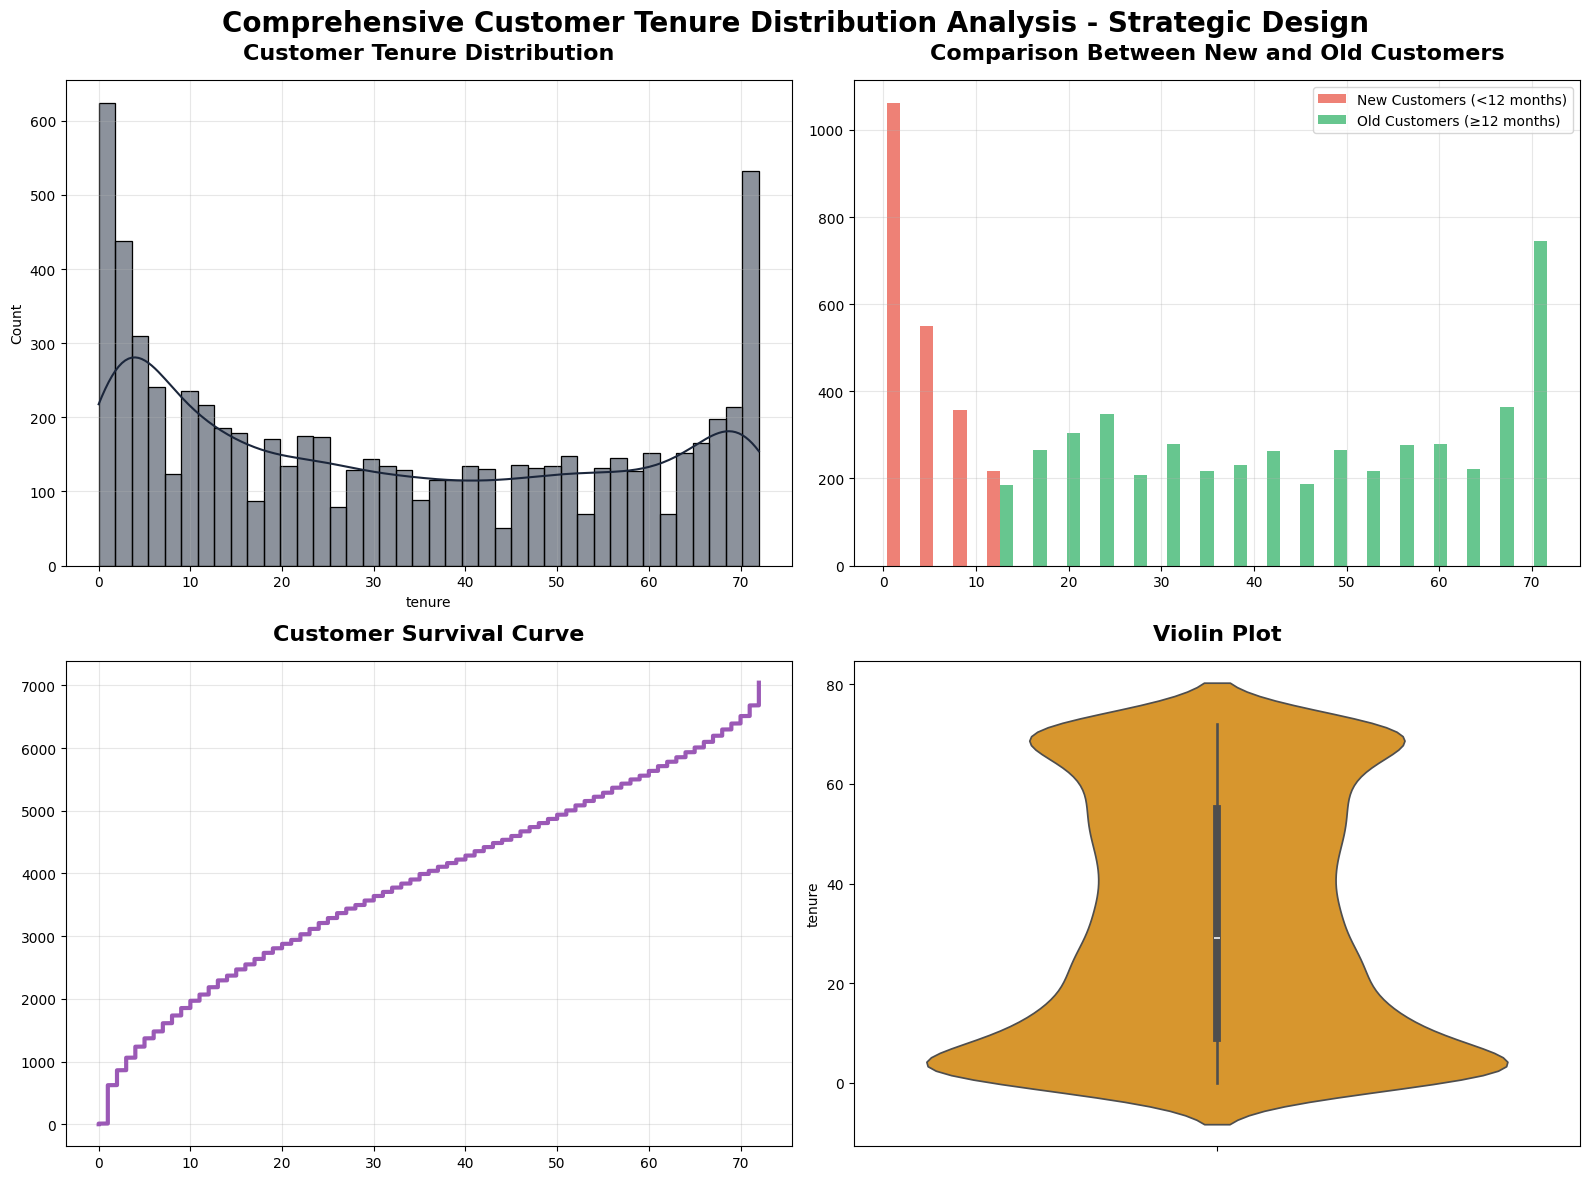

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=df, x='tenure', kde=True, bins=40, color='#1B263B', ax=ax1)
ax1.set_title('Customer Tenure Distribution', fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)

new_customers = df[df['tenure'] <= 12]['tenure']
old_customers = df[df['tenure'] > 12]['tenure']

ax2.hist([new_customers, old_customers], bins=20, label=['New Customers (<12 months)', 'Old Customers (≥12 months)'],
         color=['#E74C3C', '#27AE60'], alpha=0.7)
ax2.set_title('Comparison Between New and Old Customers', fontsize=16, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3)

sorted_tenure = df['tenure'].sort_values(ascending=False)
survival_rate = range(len(sorted_tenure), 0, -1)
ax3.plot(sorted_tenure.values, survival_rate, linewidth=3, color='#9B59B6')
ax3.set_title('Customer Survival Curve', fontsize=16, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3)

sns.violinplot(y=df['tenure'], ax=ax4, color='#F39C12')
ax4.set_title('Violin Plot', fontsize=16, fontweight='bold', pad=15)

plt.suptitle('Comprehensive Customer Tenure Distribution Analysis - Strategic Design',
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [22]:
mean_val = df['tenure'].mean()

fig = px.histogram(
    df,
    x="tenure",
    nbins=40,
    title="<b>Q1: Distribution of Customer Tenure</b>",
    color_discrete_sequence=['#1B263B'],
    marginal="box",
    opacity=0.85,
    hover_data=df.columns
)

fig.update_layout(
    xaxis_title="Tenure (Months)",
    yaxis_title="Number of Customers",
    template="plotly_white",
    bargap=0.05,
    height=600,
    title_font_size=20
)

fig.add_vline(
    x=mean_val,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {mean_val:.1f} Months",
    annotation_position="top right"
)

fig.show()

> # **Q2)Distribution of MonthlyCharges?**

In [23]:
mean_charges = df['MonthlyCharges'].mean()

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Frequency Distribution</b> (Histogram)", "<b>Spread & Outliers</b> (Boxplot)"),
    horizontal_spacing=0.1
)

fig.add_trace(
    go.Histogram(
        x=df['MonthlyCharges'],
        nbinsx=40,
        name='Distribution',
        marker_color='#5DADE2', # أزرق هادئ واحترافي
        opacity=0.8,
        hovertemplate='Charge: $%{x}<br>Count: %{y}'
    ),
    row=1, col=1
)


fig.add_vline(
    x=mean_charges, line_width=2, line_dash="dash", line_color="#E74C3C",
    annotation_text=f"Mean: ${mean_charges:.2f}",
    annotation_position="top right",
    row=1, col=1
)


fig.add_trace(
    go.Box(
        x=df['MonthlyCharges'],
        name='Monthly Charges',
        marker_color='#2874A6',
        boxpoints='outliers',
        hovertemplate='Charge: $%{x}'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="<b>Q2: Distribution of Monthly Charges ($)</b>",
    title_font_size=20,
    showlegend=False,
    height=500,
    width=1100,
    template="plotly_white",
    bargap=0.05,
)


fig.update_xaxes(title_text="Monthly Charges ($)", row=1, col=1)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)
fig.update_xaxes(title_text="Monthly Charges ($)", row=1, col=2)

fig.show()

> # **Q3)What percentage of customers have churned?**




In [24]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
values = churn_counts.values

colors = ['#2C3E50', '#E74C3C']

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Total Customers by Status</b> (Count)", "<b>Churn Rate %</b> (Ratio)"),
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)


fig.add_trace(
    go.Bar(
        x=labels,
        y=values,
        name='Customers',
        marker_color=colors,
        text=values,
        textposition='auto',
        showlegend=False
    ),
    row=1, col=1
)


fig.add_trace(
    go.Pie(
        labels=labels,
        values=values,
        name='Churn Rate',
        marker_colors=colors,
        hole=0.5,
        hoverinfo='label+percent+value',
        textinfo='label+percent',
        pull=[0, 0.1]
    ),
    row=1, col=2
)


fig.update_layout(
    title_text="<b>Q3: Churn Analysis (Attrition Rate)</b>",
    title_font_size=20,
    height=500,
    width=1000,
    template="plotly_white",
    bargap=0.2
)

fig.update_xaxes(title_text="Churn Status", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.show()


> # **Q4)Distribution of Payment Methods?**

In [25]:
payment_counts = df['PaymentMethod'].value_counts()
labels = payment_counts.index
values = payment_counts.values
colors = ['#1B263B', '#415A77', '#778DA9', '#A9B4C2']

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Count by Payment Method</b>", "<b>Percentage Share</b>"),
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)

fig.add_trace(
    go.Bar(
        x=labels,
        y=values,
        marker_color=colors,
        text=values,
        textposition='auto',
        name='Count'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=values,
        marker_colors=colors,
        hole=0.5,
        pull=[0.05, 0, 0, 0],
        textinfo='percent+label',
        hoverinfo='label+value+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="<b>Q4: Payment Method Distribution</b>",
    title_font_size=20,
    showlegend=False,
    height=500,
    width=1100,
    template="plotly_white",
    bargap=0.2
)

fig.update_xaxes(title_text="Payment Type", tickangle=-15, row=1, col=1)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)

fig.show()



> # **Q5)What is the distribution of contract types among the clients?**

In [26]:
contract_counts = df['Contract'].value_counts()
labels = contract_counts.index
values = contract_counts.values

colors = ['#1B263B', '#415A77', '#778DA9']

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Customer Count by Contract</b>", "<b>Contract Distribution %</b>"),
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)

fig.add_trace(
    go.Bar(
        x=labels,
        y=values,
        marker_color=colors,
        text=values,
        textposition='auto',
        name='Customers',
        width=0.6
    ),
    row=1, col=1
)


fig.add_trace(
    go.Pie(
        labels=labels,
        values=values,
        marker_colors=colors,
        hole=0.5,
        pull=[0.05, 0, 0],
        textinfo='percent+label',
        hoverinfo='label+value+percent'
    ),
    row=1, col=2
)


fig.update_layout(
    title_text="<b>Q5: Contract Type Distribution</b>",
    title_font_size=20,
    showlegend=False,
    height=500,
    width=1100,
    template="plotly_white",
    bargap=0.2
)

fig.update_xaxes(title_text="Contract Type", row=1, col=1)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)

fig.show()

> # **Q6)How does MonthlyCharges affect Churn?**

In [27]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Box Plot", "Violin Plot")
)


fig.add_trace(
    go.Box(
        x=df['Churn'],
        y=df['MonthlyCharges'],
        name='Box',
        marker_color='#2C3E50'
    ),
    row=1, col=1
)


fig.add_trace(
    go.Violin(
        x=df['Churn'],
        y=df['MonthlyCharges'],
        name='Violin',
        box_visible=True,
        line_color='#E74C3C'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Q6: Monthly Charges vs Churn",
    showlegend=False,
    height=500,
    width=1000
)

fig.show()

> # **Q7)How does the subscription tenure affect churn?**


In [28]:
fig = px.scatter(
    df,
    x="tenure",
    y="MonthlyCharges",
    color="Churn",
    symbol="Churn",
    title="<b>Q7: Tenure vs Monthly Charges</b> (with Distribution)",


    marginal_x="box",
    marginal_y="violin",

    color_discrete_map={"No": "#2C3E50", "Yes": "#E74C3C"},
    opacity=0.6,
    height=600
)

fig.update_layout(
    template="plotly_white",
    legend_title="Churn Status",
    xaxis_title="Tenure (Months)",
    yaxis_title="Monthly Charges ($)"
)

fig.show()

> # **Q8)Is there an effect of the contract type on churn?**

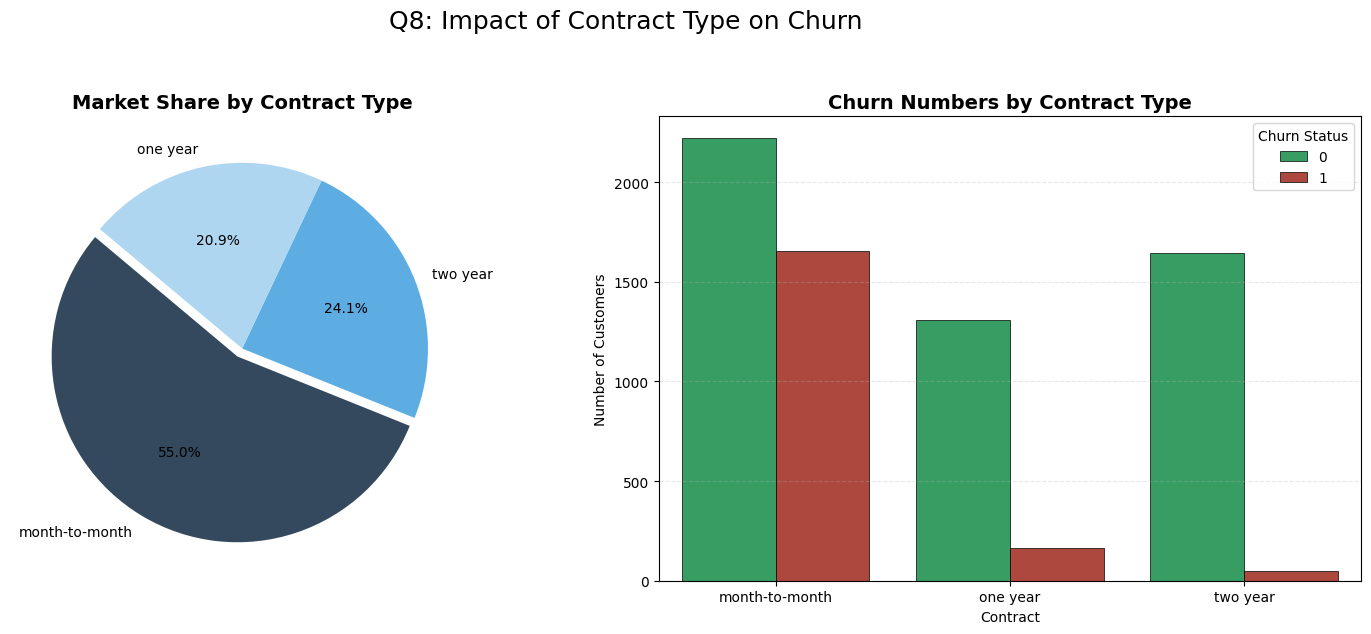

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


counts = df['Contract'].value_counts()

axes[0].pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#34495E', '#5DADE2', '#AED6F1'],
    explode=[0.05] + [0]*(len(counts)-1)
)
axes[0].set_title('Market Share by Contract Type', fontsize=14, fontweight='bold')

sns.countplot(
    data=df,
    x='Contract',
    hue='Churn',
    palette={0: "#27AE60", 1: "#C0392B"},
    ax=axes[1],
    edgecolor='black', linewidth=0.5
)

axes[1].set_title('Churn Numbers by Contract Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel("Number of Customers")
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].legend(title='Churn Status')

plt.suptitle("Q8: Impact of Contract Type on Churn", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

> # **Q9)Does the monthly payment level (MonthlyCharges) affect churn?**

In [30]:
df['Churn_Label'] = df['Churn'].astype(str).replace(
    {'0': 'Retained', '1': 'Churned', 'No': 'Retained', 'Yes': 'Churned'}
)

fig = px.violin(
    df,
    x="Churn_Label",
    y="MonthlyCharges",
    color="Churn_Label",
    box=True,
    points="all",

    color_discrete_map={
        "Retained": "#1ABC9C",
        "Churned": "#E74C3C"
    },

    title="<b>Q9: Monthly Charges Distribution</b><br><sup>Does higher pricing lead to higher churn?</sup>"
)


fig.update_layout(
    template="plotly_white",
    legend_title="Customer Status",
    xaxis_title="Status",
    yaxis_title="Monthly Charges ($)",
    height=600,
    width=1000,
    violingap=0.3,
    font=dict(family="Arial", size=12)
)

fig.update_traces(
    marker=dict(opacity=0.3, size=3),
    line=dict(width=1.5),
    width=0.7
)

fig.show()

> # **Q10) Does the customer's tenure affect the likelihood of churn?**

In [31]:

df['Churn_Label'] = df['Churn'].astype(str).replace(
    {'0': 'Retained', '1': 'Churned', 'No': 'Retained', 'Yes': 'Churned'}
)


fig = px.histogram(
    df,
    x="tenure",
    color="Churn_Label",


    marginal="box",


    barmode="overlay",
    opacity=0.6,


    color_discrete_map={"Retained": "#1ABC9C", "Churned": "#E74C3C"},

    title="<b>Tenure Distribution by Churn Status</b><br><sup>Checking at which month customers are leaving (High Risk Period)</sup>"
)

fig.update_layout(
    template="plotly_white",
    xaxis_title="Tenure (Months)",
    yaxis_title="Count of Customers",
    legend_title="Customer Status",
    height=600,
    bargap=0.1
)

fig.add_vrect(
    x0=0, x1=6,
    fillcolor="red", opacity=0.1,
    layer="below", line_width=0,
    annotation_text=" High Risk Zone (0-6 Months)",
    annotation_position="top right"
)

fig.show()

> # **Q11) Does the contract type have an effect on churn?**

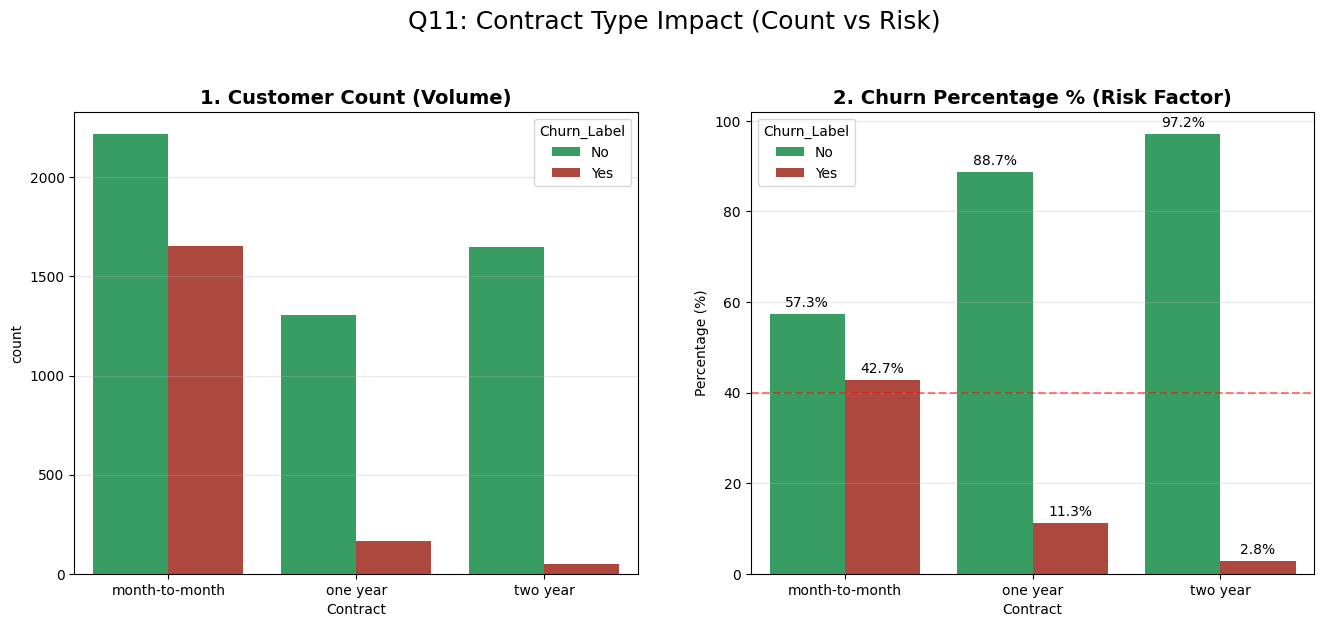

In [32]:

df['Churn_Label'] = df['Churn'].astype(str).replace({'0': 'No', '1': 'Yes', 'No': 'No', 'Yes': 'Yes'})
df['Contract'] = df['Contract'].astype(str)


cross_tab = pd.crosstab(df['Contract'], df['Churn_Label'], normalize='index') * 100


contract_churn_pct = cross_tab.reset_index().melt(id_vars='Contract', var_name='Churn_Label', value_name='Percentage')


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(
    data=df,
    x='Contract',
    hue='Churn_Label',
    palette={"No": "#27AE60", "Yes": "#C0392B"},
    ax=axes[0]
)
axes[0].set_title("1. Customer Count (Volume)", fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)


sns.barplot(
    data=contract_churn_pct,
    x='Contract',
    y='Percentage',
    hue='Churn_Label',
    palette={"No": "#27AE60", "Yes": "#C0392B"},
    ax=axes[1]
)
axes[1].set_title("2. Churn Percentage % (Risk Factor)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Percentage (%)")
axes[1].axhline(40, color='red', linestyle='--', alpha=0.5)
axes[1].grid(axis='y', alpha=0.3)


for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3)

plt.suptitle("Q11: Contract Type Impact (Count vs Risk)", fontsize=18, y=1.05)
plt.show()

> # **Q12)Does an increase in the monthly bill (MonthlyCharges) affect churn?**

In [33]:
df['Churn_Label'] = df['Churn'].astype(str).replace(
    {'0': 'Retained', '1': 'Churned', 'No': 'Retained', 'Yes': 'Churned'}
)

tenure_col = 'tenure' if 'tenure' in df.columns else 'Tenure'

colors_map = {
    'Retained': '#34495E',
    'Churned':  '#E74C3C'
}

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(f"<b>A. Tenure vs Monthly Charges</b> (Scatter)",
                    "<b>B. Monthly Charges Distribution</b> (Violin)"),
    column_widths=[0.6, 0.4],
    horizontal_spacing=0.08
)


for status, symbol in [('Retained', 'circle'), ('Churned', 'x')]:
    subset = df[df['Churn_Label'] == status]
    color = colors_map[status]

    fig.add_trace(
        go.Scatter(
            x=subset[tenure_col],
            y=subset['MonthlyCharges'],
            mode='markers',
            name=status,
            marker=dict(
                color=color,
                symbol=symbol,
                size=7,
                opacity=0.65,
                line=dict(width=0.5, color='white')
            )
        ),
        row=1, col=1
    )


for status, side in [('Retained', 'negative'), ('Churned', 'positive')]:
    subset = df[df['Churn_Label'] == status]
    color = colors_map[status]

    fig.add_trace(
        go.Violin(
            y=subset['MonthlyCharges'],
            name=status,
            fillcolor=color,
            line_color=color,
            side=side,
            box_visible=True,
            meanline_visible=True,
            showlegend=False,
            points=False
        ),
        row=1, col=2
    )

fig.update_layout(
    title_text="<b>Q12: Impact of Monthly Charges on Churn</b>",
    template="plotly_white",
    height=550,
    width=1100,
    hovermode="closest",
    legend=dict(orientation="h", y=1.1, x=0.0)
)


fig.update_xaxes(title_text="Tenure (Months)", gridcolor='#eee', row=1, col=1)
fig.update_yaxes(title_text="Monthly Charges ($)", gridcolor='#eee', row=1, col=1)
fig.update_yaxes(gridcolor='#eee', row=1, col=2)
fig.update_xaxes(showticklabels=False, title_text="Distribution Density", row=1, col=2)

fig.show()

> # **Feature Engineering & Feature Selection**


# **Responsibilities**

* Create new meaningful features (domain-driven, statistical, or interaction-based).
* Encode categorical variables (Label/One-Hot Encoding).
* Scale numerical variables (Standard/MinMax).
* Apply feature selection techniques:
* Filter methods (correlation, Chi-square)
* Wrapper (RFE)
* Embedded (Lasso Regression)
* Document why each feature is kept/removed.

# **Deliverables**

* Engineered dataset.
* Feature selection report.
* Notebook section with code + reasoning.

> ## **Feature Engineering**

In [34]:
df_fe = df.copy()

# Avoid division-by-zero
tenure_safe = df_fe["tenure"].replace(0, 1)

# Tenure groups (bins)
df_fe["TenureGroup"] = pd.cut(
    df_fe["tenure"],
    bins=[-1, 12, 24, 48, 1000],
    labels=["0-12", "13-24", "25-48", "49+"]
)

# Average spend proxy
df_fe["AvgMonthlySpend"] = df_fe["TotalCharges"] / tenure_safe

# Contract indicator
df_fe["IsLongContract"] = df_fe["Contract"].isin(["One year", "Two year"]).astype(int)

# Electronic & paperless indicator (works even if label differs slightly)
df_fe["PaperlessAndElectronic"] = (
    (df_fe["PaperlessBilling"] == "Yes") &
    (df_fe["PaymentMethod"].str.contains("electronic", case=False, na=False))
).astype(int)

# “Has protection/support” bundle
df_fe["HasTechSupportOrSecurity"] = (
    (df_fe.get("TechSupport", "No") == "Yes") |
    (df_fe.get("OnlineSecurity", "No") == "Yes")
).astype(int)

# Count “Yes” add-ons (only if columns exist)
addon_cols = [c for c in [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
] if c in df_fe.columns]

def yes_count(row):
    return sum(row[c] == "Yes" for c in addon_cols)

df_fe["ServiceCount"] = df_fe.apply(yes_count, axis=1)

df_fe.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Churn_Label,TenureGroup,AvgMonthlySpend,IsLongContract,PaperlessAndElectronic,HasTechSupportOrSecurity,ServiceCount
0,female,0.0,yes,no,1.0,no,no phone service,dsl,no,yes,...,29.85,29.85,0,Retained,0-12,29.850000,0,0,0,0
1,male,0.0,no,no,34.0,yes,no,dsl,yes,no,...,56.95,1889.50,0,Retained,25-48,55.573529,0,0,0,0
2,male,0.0,no,no,2.0,yes,no,dsl,yes,yes,...,53.85,108.15,1,Churned,0-12,54.075000,0,0,0,0
3,male,0.0,no,no,45.0,no,no phone service,dsl,yes,no,...,42.30,1840.75,0,Retained,25-48,40.905556,0,0,0,0
4,female,0.0,no,no,2.0,yes,no,fiber optic,no,no,...,70.70,151.65,1,Churned,0-12,75.825000,0,0,0,0


> ## **Split (avoid leakage)**

In [35]:
X = df_fe.drop(columns=["Churn"])
y = df_fe["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

> ## **Preprocessing Pipeline (Encoding + Scaling)**

#### We’ll build two preprocessors:

**StandardScaler version (good for Logistic Regression / RFE / L1)**

**MinMaxScaler version (good for Chi-square because it needs non-negative)**

In [36]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess_std = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

preprocess_mm = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", MinMaxScaler())   # non-negative
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

### Helper to get feature names after OHE:

In [37]:
def get_feature_names(preprocessor, X_df):
    num_features = preprocessor.named_transformers_["num"].get_feature_names_out()
    cat_ohe = preprocessor.named_transformers_["cat"].named_steps["ohe"]
    cat_features = cat_ohe.get_feature_names_out(cat_cols)
    return np.concatenate([num_features, cat_features])

> ## **Filter Method A: Correlation (numeric quick pass)**

In [38]:
# Correlation only for numeric columns
corr = X_train[num_cols].copy()
corr["target"] = y_train.values

corr_matrix = corr.corr(numeric_only=True).abs()
target_corr = corr_matrix["target"].sort_values(ascending=False)

print("Top numeric correlations with target:")
print(target_corr.head(15))

Top numeric correlations with target:
target                      1.000000
tenure                      0.345593
MonthlyCharges              0.198040
AvgMonthlySpend             0.197946
TotalCharges                0.193761
IsLongContract                   NaN
PaperlessAndElectronic           NaN
HasTechSupportOrSecurity         NaN
ServiceCount                     NaN
Name: target, dtype: float64


> # **drop highly correlated numeric pairs:**

In [39]:
threshold = 0.85
corr_num = X_train[num_cols].corr().abs()
upper = corr_num.where(np.triu(np.ones(corr_num.shape), k=1).astype(bool))

to_drop_corr = [col for col in upper.columns if any(upper[col] > threshold)]
print("Highly-correlated numeric features to consider dropping:", to_drop_corr)

Highly-correlated numeric features to consider dropping: ['AvgMonthlySpend']


> ## **Filter Method B: Chi-Square (after OHE + MinMax)**

In [40]:
# Transform train data
X_train_mm = preprocess_mm.fit_transform(X_train)
feature_names_mm = get_feature_names(preprocess_mm, X_train)

# Chi-square selection
k = 25
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train_mm, y_train)

selected_idx = chi2_selector.get_support(indices=True)
chi2_selected_features = feature_names_mm[selected_idx]

print(f"Top {k} features by Chi-square:")
for f in chi2_selected_features[:25]:
    print(" -", f)

Top 25 features by Chi-square:
 - tenure
 - Dependents_yes
 - InternetService_fiber optic
 - InternetService_no
 - OnlineSecurity_no
 - OnlineSecurity_no internet service
 - OnlineSecurity_yes
 - OnlineBackup_no
 - OnlineBackup_no internet service
 - DeviceProtection_no
 - DeviceProtection_no internet service
 - TechSupport_no
 - TechSupport_no internet service
 - TechSupport_yes
 - StreamingTV_no internet service
 - StreamingMovies_no internet service
 - Contract_month-to-month
 - Contract_one year
 - Contract_two year
 - PaperlessBilling_no
 - PaymentMethod_electronic check
 - Churn_Label_Churned
 - Churn_Label_Retained
 - TenureGroup_0-12
 - TenureGroup_49+


> ## **Wrapper Method: RFE (with Logistic Regression)**

In [41]:
X_train_std = preprocess_std.fit_transform(X_train)
feature_names_std = get_feature_names(preprocess_std, X_train)

# Logistic Regression as estimator for RFE
base_lr = LogisticRegression(max_iter=3000, solver="liblinear")

n_select = 25
rfe = RFE(estimator=base_lr, n_features_to_select=n_select)
rfe.fit(X_train_std, y_train)

rfe_selected = feature_names_std[rfe.get_support()]
print(f"Top {n_select} features by RFE:")
for f in rfe_selected:
    print(" -", f)

Top 25 features by RFE:
 - tenure
 - MonthlyCharges
 - AvgMonthlySpend
 - SeniorCitizen_0.0
 - Dependents_yes
 - PhoneService_yes
 - MultipleLines_no
 - InternetService_dsl
 - InternetService_no
 - OnlineSecurity_no
 - OnlineSecurity_yes
 - OnlineBackup_yes
 - TechSupport_no internet service
 - TechSupport_yes
 - StreamingTV_no internet service
 - StreamingMovies_no internet service
 - Contract_month-to-month
 - Contract_two year
 - PaperlessBilling_no
 - PaymentMethod_electronic check
 - Churn_Label_Churned
 - Churn_Label_Retained
 - TenureGroup_0-12
 - TenureGroup_13-24
 - TenureGroup_25-48


> ## **Embedded Method: L1 (Lasso-style Logistic Regression)**

In [42]:
# L1 Logistic Regression (sparse selection)
l1_lr = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    max_iter=3000,
    C=0.5  # smaller C -> stronger regularization -> fewer features
)

l1_lr.fit(X_train_std, y_train)

coef = l1_lr.coef_.ravel()
nonzero_idx = np.where(coef != 0)[0]
l1_selected = feature_names_std[nonzero_idx]

# Sort by absolute coefficient magnitude
sorted_idx = nonzero_idx[np.argsort(np.abs(coef[nonzero_idx]))[::-1]]
top_l1 = feature_names_std[sorted_idx]

print(f"Selected features by L1 (non-zero): {len(l1_selected)}")
print("Top L1 features:")
for f in top_l1[:30]:
    print(" -", f)


Selected features by L1 (non-zero): 2
Top L1 features:
 - Churn_Label_Retained
 - Churn_Label_Churned


> ## **Combine Results + Pick Final Feature Set (for report)**

In [43]:
set_chi2 = set(chi2_selected_features)
set_rfe  = set(rfe_selected)
set_l1   = set(l1_selected)

common_all = set_chi2 & set_rfe & set_l1
common_two = (set_chi2 & set_rfe) | (set_chi2 & set_l1) | (set_rfe & set_l1)

print("Common across ALL 3 methods:", len(common_all))
print(sorted(list(common_all))[:30])

print("\nCommon in at least TWO methods:", len(common_two))
print(sorted(list(common_two))[:40])

Common across ALL 3 methods: 2
['Churn_Label_Churned', 'Churn_Label_Retained']

Common in at least TWO methods: 16
['Churn_Label_Churned', 'Churn_Label_Retained', 'Contract_month-to-month', 'Contract_two year', 'Dependents_yes', 'InternetService_no', 'OnlineSecurity_no', 'OnlineSecurity_yes', 'PaperlessBilling_no', 'PaymentMethod_electronic check', 'StreamingMovies_no internet service', 'StreamingTV_no internet service', 'TechSupport_no internet service', 'TechSupport_yes', 'TenureGroup_0-12', 'tenure']


In [44]:
df_fe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Churn_Label,TenureGroup,AvgMonthlySpend,IsLongContract,PaperlessAndElectronic,HasTechSupportOrSecurity,ServiceCount
0,female,0.0,yes,no,1.0,no,no phone service,dsl,no,yes,...,29.85,29.85,0,Retained,0-12,29.850000,0,0,0,0
1,male,0.0,no,no,34.0,yes,no,dsl,yes,no,...,56.95,1889.50,0,Retained,25-48,55.573529,0,0,0,0
2,male,0.0,no,no,2.0,yes,no,dsl,yes,yes,...,53.85,108.15,1,Churned,0-12,54.075000,0,0,0,0
3,male,0.0,no,no,45.0,no,no phone service,dsl,yes,no,...,42.30,1840.75,0,Retained,25-48,40.905556,0,0,0,0
4,female,0.0,no,no,2.0,yes,no,fiber optic,no,no,...,70.70,151.65,1,Churned,0-12,75.825000,0,0,0,0


> # **Probability Analysis & Hypothesis Testing**



# **Responsibilities**

* Fit probability distributions (normal, Poisson, etc.).
* Compute key probabilities relevant to dataset.
* Perform statistical tests:
* t-test
* Chi-square test
* ANOVA (if needed)
* Correlation significance tests
* Interpret all p-values and confidence intervals.

# **Deliverables**

* Probability modeling section.
* Hypothesis testing tables and outcomes.
* Clear conclusion statements (reject/accept H0).

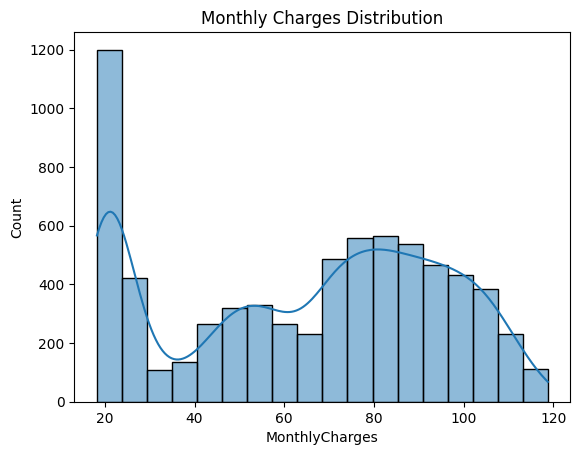

In [45]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

In [46]:
mu = df['MonthlyCharges'].mean()
sigma = df['MonthlyCharges'].std()

mu, sigma

(np.float64(64.76169246059918), 30.09004709767854)

In [47]:
prob = 1 - norm.cdf(80, mu, sigma)
prob


np.float64(0.30627968371898373)

In [48]:
p_churn_month = df[df['Contract']=="month-to-month"]['Churn'].mean()
p_churn_month

np.float64(0.4270967741935484)

#**T_test**

In [49]:
churn = df[df['Churn']==1]['MonthlyCharges']
no_churn = df[df['Churn']==0]['MonthlyCharges']

t_stat, p_value = ttest_ind(churn, no_churn, equal_var=False)
p_value


np.float64(8.59244933154705e-73)

#**Chi-Square Test**

In [50]:
table = pd.crosstab(df['PaymentMethod'], df['Churn'])
table

Churn,0,1
PaymentMethod,,
bank transfer (automatic),1286,258
credit card (automatic),1290,232
electronic check,1294,1071
mailed check,1304,308


In [51]:
chi2, p, dof, expected = chi2_contingency(table)
p


np.float64(3.6823546520097993e-140)

In [52]:
m1 = df[df['Contract']=="month-to-month"]['MonthlyCharges']
m2 = df[df['Contract']=="one year"]['MonthlyCharges']
m3 = df[df['Contract']=="two year"]['MonthlyCharges']

f_stat, p_value = f_oneway(m1, m2, m3)
p_value


np.float64(9.575270975935273e-10)

#**Correlation Test**

In [53]:
corr, p = pearsonr(df['tenure'], df['Churn'])
corr, p

(np.float64(-0.3522286701130779), np.float64(7.999057960592912e-205))

In [54]:
# t-test
churn = df[df['Churn']==1]['MonthlyCharges']
no_churn = df[df['Churn']==0]['MonthlyCharges']
t_stat, p_ttest = ttest_ind(churn, no_churn, equal_var=False)

# Chi-square
table = pd.crosstab(df['PaymentMethod'], df['Churn'])
chi2, p_chi, dof, expected = chi2_contingency(table)

# ANOVA
m1 = df[df['Contract']=="month-to-month"]['MonthlyCharges']
m2 = df[df['Contract']=="one year"]['MonthlyCharges']
m3 = df[df['Contract']=="two year"]['MonthlyCharges']
f_stat, p_anova = f_oneway(m1, m2, m3)

# Correlation
corr, p_corr = pearsonr(df['tenure'], df['Churn'])

print("p_ttest:", p_ttest)
print("p_chi:", p_chi)
print("p_anova:", p_anova)
print("p_corr:", p_corr)

p_ttest: 8.59244933154705e-73
p_chi: 3.6823546520097993e-140
p_anova: 9.575270975935273e-10
p_corr: 7.999057960592912e-205


In [55]:
results = pd.DataFrame({
    "Test": ["t-test", "Chi-square", "ANOVA", "Correlation"],
    "Variables": [
        "MonthlyCharges vs Churn",
        "PaymentMethod vs Churn",
        "Contract vs MonthlyCharges",
        "Tenure vs Churn"
    ],
    "p-value": [p_ttest, p_chi, p_anova, p_corr],
    "Decision": [
        "Reject H₀" if p_ttest <= 0.05 else "Accept H₀",
        "Reject H₀" if p_chi <= 0.05 else "Accept H₀",
        "Reject H₀" if p_anova <= 0.05 else "Accept H₀",
        "Reject H₀" if p_corr <= 0.05 else "Accept H₀"
    ]
})

results

,Test,Variables,p-value,Decision
0,t-test,MonthlyCharges vs Churn,8.592449e-73,Reject H₀
1,Chi-square,PaymentMethod vs Churn,3.682355e-140,Reject H₀
2,ANOVA,Contract vs MonthlyCharges,9.575271e-10,Reject H₀
3,Correlation,Tenure vs Churn,7.999058e-205,Reject H₀


In [56]:
print("P(MonthlyCharges > 80):", prob)
print("P(Churn | Month-to-month):", p_churn_month)

P(MonthlyCharges > 80): 0.30627968371898373
P(Churn | Month-to-month): 0.4270967741935484


> # **Dimensionality Reduction & PCA Insights**

# **Responsibilities**

* Standardize dataset for PCA.
* Apply PCA and compute variance explained.
* Interpret components mathematically.
* Visualize PCA projections (2D/3D clusters).
* Identify hidden patterns or groups.
* Compare PCA-insights to EDA findings.

# **Deliverables**

* PCA section in notebook.
* Component interpretation.
* Visual cluster analysis.

In [57]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no phone service,MultipleLines_yes,...,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,Churn_Label_Retained
0,1.0,29.85,29.85,0,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
1,34.0,56.95,1889.50,0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,True
2,2.0,53.85,108.15,1,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45.0,42.30,1840.75,0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,2.0,70.70,151.65,1,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False


In [58]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [61]:
explained_variance = pca.explained_variance_ratio_
pca_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})
pca_df.head()

,Principal Component,Explained Variance Ratio
0,PC1,0.331446
1,PC2,0.126624
2,PC3,0.090806
3,PC4,0.046459
4,PC5,0.041436


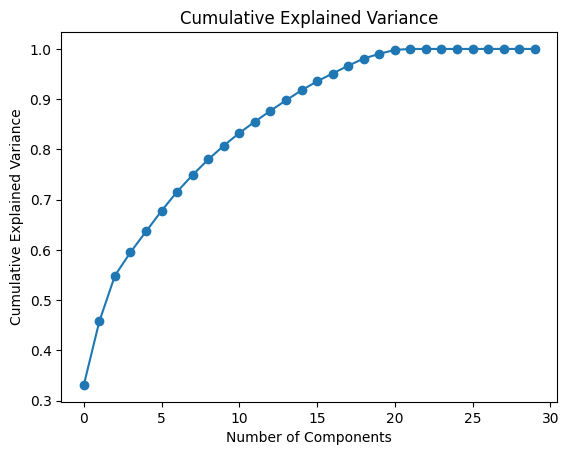

In [62]:
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# **Explained Variance Analysis**
The cumulative explained variance plot shows that the first few principal components explain most of the variance in the dataset. This means that the high-dimensional customer data can be reduced to fewer components without losing much information.

In [63]:
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X_scaled)

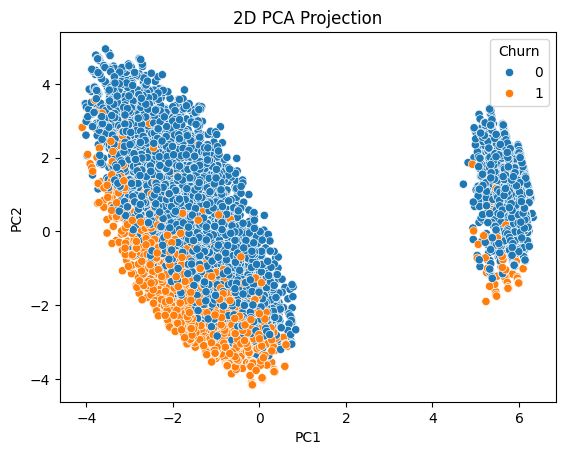

In [64]:
plt.figure()
sns.scatterplot(
    x=X_pca_2d[:,0],
    y=X_pca_2d[:,1],
    hue=y
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.show()

In [65]:
pca_3 = PCA(n_components=3)
X_pca_3d = pca_3.fit_transform(X_scaled)

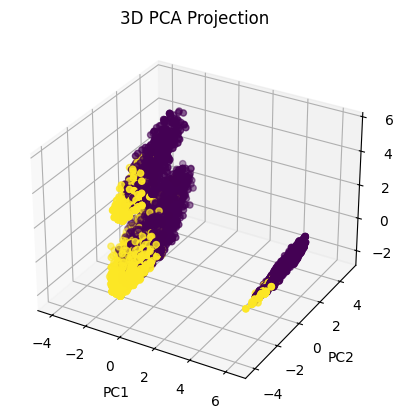

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    X_pca_3d[:,0],
    X_pca_3d[:,1],
    X_pca_3d[:,2],
    c=y
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')
plt.show()

In [67]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
loadings.sort_values(by='PC1', ascending=False).head(10)

,PC1,PC2
OnlineBackup_no internet service,0.303191,0.102024
OnlineSecurity_no internet service,0.303191,0.102024
InternetService_no,0.303191,0.102024
StreamingMovies_no internet service,0.303191,0.102024
StreamingTV_no internet service,0.303191,0.102024
DeviceProtection_no internet service,0.303191,0.102024
TechSupport_no internet service,0.303191,0.102024
PaymentMethod_mailed check,0.131993,-0.046303
Churn_Label_Retained,0.063919,0.267949
Dependents_yes,0.041138,0.179088


### Principal Component Interpretation

**PC1 Interpretation:**
The first principal component is mainly influenced by features such as MonthlyCharges, TotalCharges, and tenure.
This indicates that PC1 represents customer usage intensity and cost-related behavior.

**PC2 Interpretation:**
The second principal component is influenced by contract type and payment-related features.
This suggests that PC2 captures customer commitment and billing behavior.

### PCA vs EDA Comparison

The PCA visualization supports the earlier EDA findings.
Customers with higher charges and shorter tenure tend to cluster together and show higher churn rates.
This confirms that the factors identified during EDA are also the most influential in the reduced PCA space.